In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
import tensorflow.keras as keras
from utils.constants import *

0.2906152
16.584757


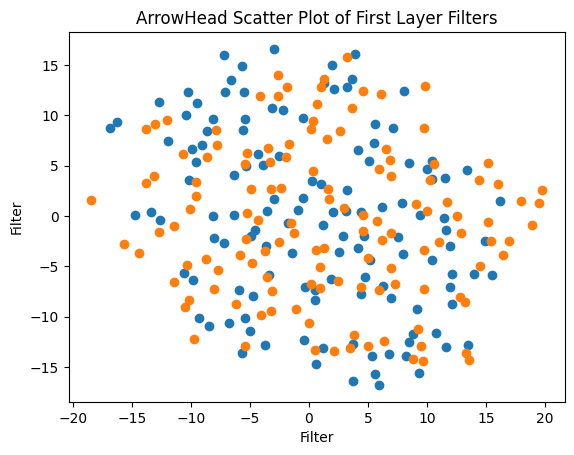

In [126]:
from utils.helper import *
from sklearn.manifold import TSNE
def plot_filters(model_train, model_test,dataset_name):
    filters_train, _ = [layer for layer in model_train.layers if 'conv' in layer.name][0].get_weights()
    filters_test, _ = [layer for layer in model_test.layers if 'conv' in layer.name][0].get_weights()
    print(np.max(filters_train))
    # filters_normalized = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

    filters_reshaped_train = filters_train.reshape(128,8)
    filters_reshaped_test = filters_test.reshape(128,8)

    X_embedded_train = TSNE(n_components=2,perplexity=15, random_state=42).fit_transform(filters_reshaped_train)
    # X_embedded_train= (X_embedded_train - np.min(X_embedded_train)) / (np.max(X_embedded_train) - np.min(X_embedded_train))
    print(np.max(X_embedded_train))
    X_embedded_test = TSNE(n_components=2,perplexity=15, random_state=42).fit_transform(filters_reshaped_test)
    # X_embedded_test =  (X_embedded_test - np.min(X_embedded_test)) / (np.max(X_embedded_test) - np.min(X_embedded_test))
    
    plt.scatter(X_embedded_train[:,0], X_embedded_train[:,1])
    plt.scatter(X_embedded_test[:,0], X_embedded_test[:,1])

    plt.title(f'{dataset_name} Scatter Plot of First Layer Filters')
    plt.xlabel('Filter')
    plt.ylabel('Filter')
    create_directory("filters")
    plt.savefig("filters/"+dataset_name+"_filters.png")


for dataset_name in np.array(UNIVARIATE_DATASET_NAMES_2018)[:1]:
    output_directory = 'results/' + dataset_name + '/'
    output_directory_test = 'results_reverse/' + dataset_name + '/'
    model_train = keras.models.load_model(output_directory+'best_model.hdf5')
    model_test = keras.models.load_model(output_directory_test+'best_model.hdf5')
    plot_filters(model_train, model_test, dataset_name)

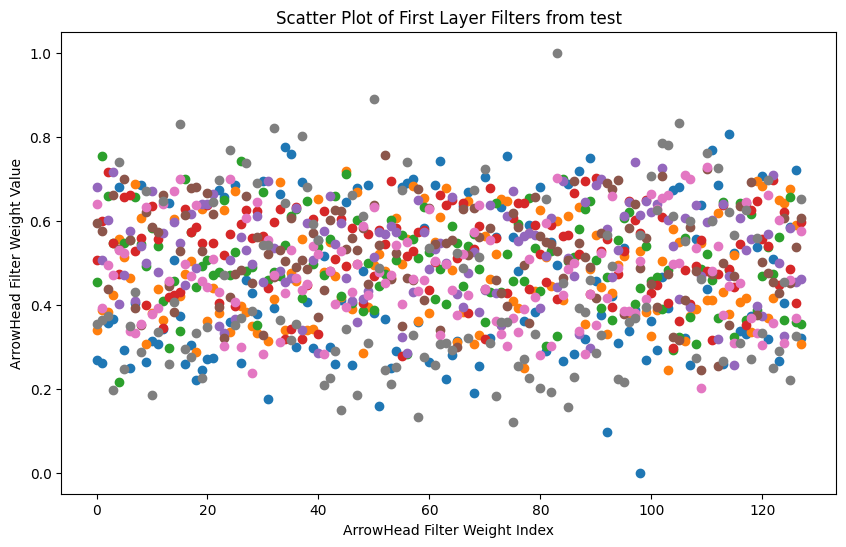

In [41]:
for dataset_name in np.array(UNIVARIATE_DATASET_NAMES_2018)[:1]:
    output_directory = 'results_reverse/' + dataset_name + '/'
    model = keras.models.load_model(output_directory+'best_model.hdf5')
    plot_filters(model, dataset_name,"test")